<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Histograma_Final/PSD_histogram_final_amostra_03_set_16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 3.8 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 166.11 MiB | 24.78 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     101  139.175873  139.407028  ...    0.036663    0.950593    1.601118
1     170  105.942986  110.783966  ...    1.000000    1.000000    1.000000
2     170  162.908234  167.893158  ...  151.608582  148.534134  145.589355
3     118    1.056306    0.242746  ...    0.036196    0.717323    1.530882
4     176  193.473648  198.352264  ...  122.911156  116.719521  112.084198
5     113  254.357117  253.815018  ...   33.507557   14.504032    7.412796
6     155  244.199768  247.511658  ...  115.263321  134.880753  168.666656
7     152  149.311630  149.171051  ...  115.795700  112.760384  120.896118
8     142  146.324341  146.340607  ...  170.546722  167.662964  165.873245
9     192  100.726562   89.881508  ...  118.449638  118.084183  118.415359
10    197  100.081741  111.449570  ...    0.297276    1.584375    0.762658
11    189   79.844986   84.547325  ...   55.010975   32.411522    1.733882
12    105  169.386688  16

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 156ms/step - loss: 0.5802 - accuracy: 0.7114 - val_loss: 0.6937 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 131ms/step - loss: 0.3900 - accuracy: 0.7930 - val_loss: 0.6936 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 132ms/step - loss: 0.2290 - accuracy: 0.9125 - val_loss: 0.6937 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 1s 133ms/step - loss: 0.1657 - accuracy: 0.9359 - val_loss: 0.6938 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 134ms/step - loss: 0.1329 - accuracy: 0.9534 - val_loss: 0.6939 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1139 - accuracy: 0.9563 - val_loss: 0.6956 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 132ms/step - loss: 0.1119 - accuracy: 0.9504 - val_loss: 0.6947 - val_accuracy: 0.4898

In [18]:
Y_test = yback(Y_test)

In [19]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        71   1
1         2  73


In [20]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.99      0.97      0.98        75

    accuracy                           0.98       147
   macro avg       0.98      0.98      0.98       147
weighted avg       0.98      0.98      0.98       147



In [21]:
'''
#X =np.array(df.copy())/255.0 
X =np.array(df.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  
prediction = model.predict(X_test)  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  
# este dado esta no formato de dicionario
df = pd.DataFrame(data, columns=['y_true','y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)
y_true = df['y_true']
y_pred = df['y_predict']  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
print(METRICS)
#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh',                       solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  prediction = model.predict(X_test)  y =np.copy(y_test)data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionariodf = pd.DataFrame(data, columns=['y_true','y_predict'])confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])print(confusion_matrix)y_true = df['y_true']y_pred = df['y_predict']
'''

"\n#X =np.array(df.copy())/255.0 \nX =np.array(df.copy())\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  \nprediction = model.predict(X_test)  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  \n# este dado esta no formato de dicionario\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\ny_true = df['y_true']\ny_pred = df['y_predict']  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\nprint(METRICS)\n#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='ta

In [22]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
3   114.0  105.443214  116.850418  ...  165.128967  114.773460  136.356720
14  131.0   86.885376   81.719368  ...    9.864518    2.186644    1.964280
11  122.0  123.400162  124.483734  ...  174.037079  172.800323  173.433487
20  200.0  163.311203  154.356796  ...  152.120010  144.771622  139.509201
25  130.0   59.711716   69.382256  ...   94.525681  108.068642  111.479767
26  113.0  154.128830  157.977356  ...   33.516487    1.581565    1.002193
37  111.0  247.895798  243.968994  ...   58.764061   59.435760   66.393311
42  137.0  180.113205  190.783463  ...    2.309766    0.936331    2.006500
0   139.0    0.242016    0.630506  ...  236.318176  232.765579  230.940826
8   120.0    0.015556    0.872222  ...  116.352219  113.562225  110.703339
19  140.0  216.440002  196.559998  ...  120.839996  129.279999  127.680000
7   115.0  153.725433  153.156052  ...  167.855713  162.079453  124.198021
45  135.0    1.213388    

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 712, done.
remote: Counting objects: 100% (473/473), done.
remote: Compressing objects: 100% (471/471), done.
remote: Total 712 (delta 300), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (712/712), 5.78 MiB | 9.45 MiB/s, done.
Resolving deltas: 100% (437/437), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 1.51 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [27]:
PSD_new.shape

(95, 2)

In [28]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [29]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
3,114.0,105.443214,116.850418,133.907669,150.361343,173.200684,189.714066,197.461380,200.086182,198.012604,206.918747,234.902115,231.986786,142.039719,109.986771,149.568481,157.247147,155.447220,156.237015,151.957520,150.475830,150.816559,150.624496,150.570938,148.330261,145.720840,141.261627,139.066772,136.762070,108.884888,106.975990,107.631889,111.776550,125.824265,144.749451,168.413681,188.604492,196.231140,211.501083,220.546936,...,174.835327,173.208984,170.714981,170.223145,178.306244,186.640503,185.315186,192.924286,213.159744,155.926758,120.719299,141.835938,181.471832,186.201904,190.504166,199.288406,202.144669,202.635880,199.161591,187.648499,153.912582,176.520782,197.701767,200.343185,192.811935,173.657745,163.587265,173.787323,180.158813,182.381042,182.562943,183.800873,189.690674,195.517090,201.800873,215.856277,236.058487,165.128967,114.773460,136.356720
14,131.0,86.885376,81.719368,84.174522,82.630096,85.645409,87.216179,86.158791,84.610626,79.944931,72.560974,73.094055,72.356339,76.872383,98.636620,108.697105,115.538429,116.395309,113.558762,109.171021,99.509003,99.828506,96.163208,93.924828,96.983276,103.427597,108.890564,105.622688,86.773094,78.291245,74.184601,73.404991,78.958275,82.902100,81.618950,80.847328,81.341934,81.495079,72.536156,75.227608,...,34.781013,31.013050,34.780724,37.334885,34.636734,28.860264,30.228424,31.799425,27.909618,21.876406,5.146494,9.379814,14.384360,18.205814,22.637434,22.796747,23.215546,27.821455,34.689529,33.292175,27.332500,25.300797,19.221548,9.467455,2.950702,2.344444,14.983159,33.905949,32.547695,33.446358,44.304642,42.147659,33.332382,31.422819,34.889809,34.479805,25.672222,9.864518,2.186644,1.964280
11,122.0,123.400162,124.483734,120.857292,125.143242,128.000534,138.706802,144.707062,152.993011,163.595261,168.422440,172.867783,174.225464,175.094604,154.679108,103.385109,91.708130,89.773987,101.377846,131.314423,163.307968,178.273834,175.352600,171.756790,177.722382,177.242676,182.490723,186.671860,189.780701,127.542046,128.690140,120.986282,126.196716,141.809189,152.160706,156.355011,162.595261,171.939789,173.640945,170.327606,...,156.218231,180.255295,194.006989,200.271423,185.346146,177.414948,180.299103,181.450958,181.609772,178.915878,174.523514,172.194016,164.485901,171.800049,174.083298,174.331619,174.429703,174.874207,177.836060,181.402832,184.656525,184.754349,179.298294,166.141083,138.902710,111.124695,119.167152,155.565979,178.433731,190.407410,192.130615,179.867767,169.432678,169.649826,173.168228,172.951614,173.973663,174.037079,172.800323,173.433487
20,200.0,163.311203,154.356796,175.943192,164.314011,152.010818,145.239609,135.483185,135.380798,145.652008,153.113190,162.573608,175.337585,178.690781,158.077209,104.029205,110.206001,109.088799,102.222397,95.389206,94.391602,93.996803,94.559601,107.915207,129.563202,159.199203,178.260010,183.127197,180.547623,163.152802,160.279999,146.557999,132.951996,126.831596,126.989594,123.266808,117.639198,140.495193,159.014008,167.802795,...,168.920013,170.106812,158.694809,137.566406,132.759995,129.907608,126.109192,121.960403,146.003601,156.335999,149.589996,141.298386,210.795197,194.146835,183.516785,177.357574,147.323212,135.304398,167.842392,178.950409,172.180008,164.500793,156.541992,167.556808,170.949203,171.318420,164.766800,160.703995,153.950394,147.480408,147.994019,148.225204,132.997208,129.938782,128.625595,127.014801,147.713196,152.120010,144.771622,139.509201
25,130.0,59.711716,69.382256,71.189346,62.055153,54.573727,45.682842,45.789116,56.229824,96.186043,110.002846,113.864853,104.329239,92.165688,80.918823,71.573250,59.769230,64.275269,79.497047,87.575623,92.502487,97.672897,104.326149,114.377281,114.243309,114.327339,120.406868,128

In [30]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [31]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [32]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


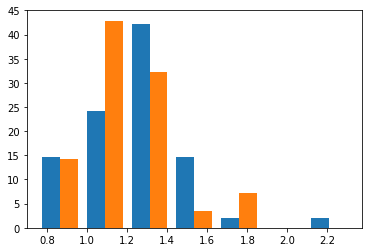

In [33]:
A = plt.hist(X,weights=wts,bins=7)

In [34]:
B = A[0][0]

In [35]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[14.736842105263156, 24.2105263157895, 42.1052631578948, 14.736842105263179, 4.21052631578948]


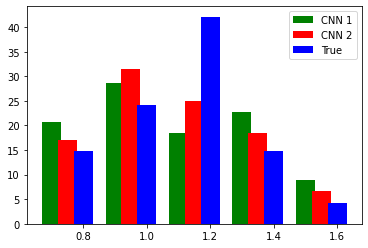

In [40]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])